

# **Data Preprocessing for Machine Learning**

### The general workflow for developing a ML model

*Define the Problem*
  - Think about what you want to achieve with ML
  - Check data availability

*Data Retrieval and Preprocessing* 
  - Retrieving data
  - Split your data into training, (validation), and testing sets 
  - Feature extraction and classify the examples if these apply to you
  - Perform normalization if necessary
  - Other techniques: redundant data removal, feature space reduction, resampling, etc.

*Model Training*
  - Optimize ML model(s) using the **training dataset only**

*Model Deployment*
  - Apply the trained ML model to the **testing dataset only** 

*Model Evaluation*
  - Use verification metrics and subjective evaluations to determine the skill of the ML model for a given task.  
  - Evaluate if the decision-making process is reasonable
  - Allow end-users to better trust the ML decisions

<br>
<br>

These steps are applicable for both classical ML and DL models. More details about the ML pipeline can be found [here](https://www.oreilly.com/library/view/building-machine-learning/9781492053187/ch01.html). 

<br>
<br>


Please cite the notebook as follows:

    Ko, M., 2021: "Data Preprocessing Introduction for Machine Learning"

This notebook was modified based on   

    Burke, A., 2020: "Traditional Machine Learning Pipeline Applied to NWP Model Data"

The data for this tutorial: 

    McGovern, A., Burke, A., Harrison, D., and G. M. Lackmann, 2020: A Machine Learning Tutorial for Operational Forecasting: Part I. Wea. Forecasting, In Press 


<br>


# Setup

Import essential libraries

In this lecture, we run ML with [scikit-learn](https://scikit-learn.org/stable/).


<br>

In [ ]:
# array data analysis
import pandas as pd
import numpy as np
# MATLAB-like plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
# Scikit-Learn: Machine Learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import gdown
! pip install netcdf4

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#precent auto-scrolling
#The next cell prevents output in the notebook from being nested in a scroll box
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;

<IPython.core.display.Javascript object>

## Import data

The next cell imports all of the data that will be used by this notebook. If anything crashes, it will probably be here.

In [ ]:
# MLurl = 'https://drive.google.com/uc?id=1ixh7rnyn-GXYg15DTNuvkkFYTYyX92bF'
# MLoutput = 'AI_tutorial_data.tar.gz'
# gdown.download(MLurl, MLoutput, quiet=False) 

In [ ]:
# ! tar -xzvf AI_tutorial_data.tar.gz
# ! rm *.tar.gz 
# !ls

In [ ]:
!wget -O "AI_tutorial_data.tar.gz"  "https://zenodo.org/record/5834841/files/AI_tutorial_data.tar.gz?download=1"

--2022-01-12 01:54:36--  https://zenodo.org/record/5834841/files/AI_tutorial_data.tar.gz?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 268165355 (256M) [application/octet-stream]
Saving to: ‘AI_tutorial_data.tar.gz’

AI_tutorial_data.ta 100%[===================>] 255.74M  5.20MB/s    in 41s     

2022-01-12 01:55:20 (6.19 MB/s) - ‘AI_tutorial_data.tar.gz’ saved [268165355/268165355]



In [ ]:
!mkdir AI_tutorial_data
!tar -xzvf AI_tutorial_data.tar.gz --directory /content/AI_tutorial_data
! rm *.tar.gz 

._.
./
./._keug_processed_data.csv
./keug_processed_data.csv
./._klch_processed_data.csv
./klch_processed_data.csv
./._klit_processed_data.csv
./klit_processed_data.csv
./._koma_processed_data.csv
./koma_processed_data.csv
./._kjax_processed_data.csv
./kjax_processed_data.csv
./._kcmh_processed_data.csv
./kcmh_processed_data.csv
./._kdbq_processed_data.csv
./kdbq_processed_data.csv
./._kgeg_processed_data.csv
./kgeg_processed_data.csv
./._kchs_processed_data.csv
./kchs_processed_data.csv
./._kcys_processed_data.csv
./kcys_processed_data.csv
./._kast_processed_data.csv
./kast_processed_data.csv
./._kdfw_processed_data.csv
./kdfw_processed_data.csv
./._kboi_processed_data.csv
./kboi_processed_data.csv
./._kdlh_processed_data.csv
./kdlh_processed_data.csv
./._kbro_processed_data.csv
./kbro_processed_data.csv
./._kroa_processed_data.csv
./kroa_processed_data.csv


<br>

## Prediction Problem and Dataset Information

<br>




<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/NWS_Weather_Forecast_Offices.svg/720px-NWS_Weather_Forecast_Offices.svg.png" width="600">


We are going to mimic the [WxChallenge](https://www.wxchallenge.com/) (with slight changes for time constraints)
  - Predict the high temperature of a given city, FWD (Ft Worth and Dallas)
  - Learn the general ML workflow from this problem
  - Apply your knowledge to another city or to a different problem


In [ ]:
# Load DFW (Dallas-Ft. Worth) file
total_dataset = pd.read_csv('AI_tutorial_data/kdfw_processed_data.csv',index_col=0).sort_values(by='date') ##kdfw - Dallas-Ft Worth, TX
total_dataset = total_dataset.replace('********', np.nan).replace(np.inf,np.nan).dropna(how='any',axis=1)

In [ ]:
total_dataset.shape

(3143, 2693)

In [ ]:
#First five rows
total_dataset.head()

,date,OBS_tmpf_max,OBS_tmpf_min,OBS_sknt_max,OBS_phour,GFS0_pmsl_max,GFS0_pmsl_min,GFS0_pmsl_avg,GFS0_pres_max,GFS0_pres_min,GFS0_pres_avg,GFS0_sktc_max,GFS0_sktc_min,GFS0_sktc_avg,GFS0_stc1_max,GFS0_stc1_min,GFS0_stc1_avg,GFS0_snfl_max,GFS0_snfl_min,GFS0_snfl_avg,GFS0_wtns_max,GFS0_wtns_min,GFS0_wtns_avg,GFS0_p01m_max,GFS0_p01m_min,GFS0_p01m_avg,GFS0_c01m_max,GFS0_c01m_min,GFS0_c01m_avg,GFS0_stc2_max,GFS0_stc2_min,GFS0_stc2_avg,GFS0_lcld_max,GFS0_lcld_min,GFS0_lcld_avg,GFS0_mcld_max,GFS0_mcld_min,GFS0_mcld_avg,GFS0_hcld_max,GFS0_hcld_min,...,NAMMOS0_vis_max,NAMMOS0_vis_min,NAMMOS0_vis_avg,NAMMOS0_poz_max,NAMMOS0_poz_min,NAMMOS0_poz_avg,NAMMOS0_pos_max,NAMMOS0_pos_min,NAMMOS0_pos_avg,NAMMOS12_n_x_max,NAMMOS12_tmp_max,NAMMOS12_tmp_min,NAMMOS12_tmp_avg,NAMMOS12_dpt_max,NAMMOS12_dpt_min,NAMMOS12_dpt_avg,NAMMOS12_wdr,NAMMOS12_wsp_max,NAMMOS12_wsp_min,NAMMOS12_wsp_avg,NAMMOS12_p06_max,NAMMOS12_p06_min,NAMMOS12_p06_avg,NAMMOS12_p12_max,NAMMOS12_q06_max,NAMMOS12_q06_min,NAMMOS12_q06_avg,NAMMOS12_q12_max,NAMMOS12_cig_max,NAMMOS12_cig_min,NAMMOS12_cig_avg,NAMMOS12_vis_max,NAMMOS12_vis_min,NAMMOS12_vis_avg,NAMMOS12_poz_max,NAMMOS12_poz_min,NAMMOS12_poz_avg,NAMMOS12_pos_max,NAMMOS12_pos_min,NAMMOS12_pos_avg
0,2011-01-01,44.06,30.02,14.0,0.0,1026.3,1015.1,1022.640000,1004.4,993.2,1000.630000,7.0,-1.5,1.990000,282.5,277.5,279.290000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,11.0,0.0,1.200000,45.0,0.0,...,7.0,7.0,7.0,5.666667,0.000000,2.111111,93.00,41.666667,72.194444,46.0,42.0,35.0,38.500000,11.0,7.0,9.0,340.0,12.0,4.0,7.000000,1.0,1.0,1.0,4.5,0.0,0.0,0.0,0.0,8.0,8.0,8.0,7.0,7.0,7.0,5.666667,0.000000,2.111111,93.00,41.666667,72.194444
1,2011-01-02,48.02,24.98,7.0,0.0,1029.5,1024.7,1026.938889,1007.6,1003.1,1005.122222,8.9,-2.4,1.788889,278.1,276.4,277.038889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,99.0,0.0,...,7.0,7.0,7.0,5.000000,0.750000,2.808036,96.75,50.000000,79.581845,23.0,47.0,25.0,35.285714,14.0,8.0,11.0,30.0,7.0,4.0,5.571429,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,8.0,8.0,8.0,7.0,7.0,7.0,5.000000,0.750000,2.808036,96.75,50.000000,79.581845
2,2011-01-03,57.92,30.92,18.0,0.0,1025.3,1017.1,1021.183333,1003.6,995.6,999.562500,12.2,-1.2,4.475000,281.5,275.7,277.929167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,41.0,0.0,4.208333,95.0,0.0,...,7.0,7.0,7.0,8.000000,5.750000,6.875000,28.00,22.500000,25.250000,0.0,54.0,54.0,54.000000,28.0,28.0,28.0,180.0,14.0,14.0,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,8.0,7.0,7.0,7.0,8.000000,5.750000,6.875000,28.00,22.500000,25.250000
3,2011-01-04,55.94,41.00,8.0,0.0,1022.6,1016.0,1018.912500,1001.0,994.5,997.312500,14.4,1.7,6.820833,283.5,278.1,280.679167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.0,0.0,16.625000,50.0,0.0,11.916667,77.0,0.0,...,7.0,7.0,7.0,1.666667,1.666667,1.666667,0.00,0.000000,0.000000,0.0,56.0,56.0,56.000000,41.0,41.0,41.0,270.0,7.0,7.0,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,8.0,7.0,7.0,7.0,1.666667,1.666667,1.666667,0.00,0.000000,0.000000
4,2011-01-05,57.92,35.96,12.0,0.0,1019.5,1014.8,1016.875000,997.8,993.0,995.162500,13.6,0.6,6.166667,282.6,277.1,280.287500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.208333,0.0,0.0,0.000000,25.0,0.0,...,7.0,7.0,7.0,1.750000,1.750000,1.750000,0.00,0.000000,0.000000,0.0,54.0,54.0,54.000000,32.0,32.0,32.0,330.0,9.0,9.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,8.0,7.0,7.0,7.0,1.750000,1.750000,1.750000,0.00,0.000000,0.000000


In [ ]:
#Last five rows
total_dataset.tail()

,date,OBS_tmpf_max,OBS_tmpf_min,OBS_sknt_max,OBS_phour,GFS0_pmsl_max,GFS0_pmsl_min,GFS0_pmsl_avg,GFS0_pres_max,GFS0_pres_min,GFS0_pres_avg,GFS0_sktc_max,GFS0_sktc_min,GFS0_sktc_avg,GFS0_stc1_max,GFS0_stc1_min,GFS0_stc1_avg,GFS0_snfl_max,GFS0_snfl_min,GFS0_snfl_avg,GFS0_wtns_max,GFS0_wtns_min,GFS0_wtns_avg,GFS0_p01m_max,GFS0_p01m_min,GFS0_p01m_avg,GFS0_c01m_max,GFS0_c01m_min,GFS0_c01m_avg,GFS0_stc2_max,GFS0_stc2_min,GFS0_stc2_avg,GFS0_lcld_max,GFS0_lcld_min,GFS0_lcld_avg,GFS0_mcld_max,GFS0_mcld_min,GFS0_mcld_avg,GFS0_hcld_max,GFS0_hcld_min,...,NAMMOS0_vis_max,NAMMOS0_vis_min,NAMMOS0_vis_avg,NAMMOS0_poz_max,NAMMOS0_poz_min,NAMMOS0_poz_avg,NAMMOS0_pos_max,NAMMOS0_pos_min,NAMMOS0_pos_avg,NAMMOS12_n_x_max,NAMMOS12_tmp_max,NAMMOS12_tmp_min,NAMMOS12_tmp_avg,NAMMOS12_dpt_max,NAMMOS12_dpt_min,NAMMOS12_dpt_avg,NAMMOS12_wdr,NAMMOS12_wsp_max,NAMMOS12_wsp_min,NAMMOS12_wsp_avg,NAMMOS12_p06_max,NAMMOS12_p06_min,NAMMOS12_p06_avg,NAMMOS12_p12_max,NAMMOS12_q06_max,NAMMOS12_q06_min,NAMMOS12_q06_avg,NAMMOS12_q12_max,NAMMOS12_cig_max,NAMMOS12_cig_min,NAMMOS12_cig_avg,NAMMOS12_vis_max,NAMMOS12_vis_min,NAMMOS12_vis_avg,NAMMOS12_poz_max,NAMMOS12_poz_min,NAMMOS12_poz_avg,NAMMOS12_pos_max,NAMMOS12_pos_min,NAMMOS12_pos_avg
3135,2019-07-29,93.9,79.0,16.0,0.0002,1014.800000,1012.20,1013.579167,994.200000,991.700000,993.004167,39.740000,28.04,31.760833,309.200000,302.800000,305.525000,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,56.000000,0.0,16.541667,100.000000,0.0,19.333333,100.000000,0.000000,...,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.0,91.0,91.0,69.0,69.0,69.0,210.0,13.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,8.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
3136,2019-07-30,100.0,77.0,12.0,0.0000,1016.100000,1011.60,1013.904167,995.500000,991.200000,993.366667,46.640000,27.24,35.235833,314.400000,301.800000,307.525000,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,4.000000,0.0,0.458333,17.000000,0.0,0.708333,86.000000,0.000000,...,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0,94.0,94.0,71.0,71.0,71.0,350.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,8.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
3137,2019-07-31,97.0,75.0,11.0,0.0000,1016.200000,1012.80,1014.329167,995.600000,992.400000,993.833333,43.440000,29.64,35.619167,313.200000,304.000000,308.370833,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,2.000000,0.0,0.083333,0.000000,0.0,0.000000,100.000000,0.000000,...,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.0,92.0,92.0,69.0,69.0,69.0,140.0,9.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,8.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
3138,2019-08-01,93.9,78.1,10.0,0.0000,1016.500000,1011.90,1014.622222,995.900000,991.500000,994.122222,43.440000,29.54,35.828889,313.600000,304.200000,307.916667,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,100.000000,0.000000,...,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,93.0,93.0,70.0,70.0,70.0,160.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,8.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
3142,2019-08-02,0.0,0.0,0.0,0.0000,1014.316667,1013.35,1013.875763,994.466667,993.466667,993.985180,35.573333,29.54,31.652408,308.233333,304.833333,306.194918,0.0,0.0,0.0,12.333333,12.166667,12.24359,0.0,0.0,0.0,0.0,0.0,0.0,204.7,204.416667,204.559982,42.333333,0.0,10.402930,1.833333,0.0,0.388889,46.666667,0.166667,...,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.0,92.0,92.0,65.0,65.0,65.0,130.0,9.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,8.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Data Pre-processing**

## Partitioning Data

* Training Set
* Validation Set
* Testing Set

1. During the training process, only use the training set to train the model. 

2. Then, validate the model with the validation set. 

3. If results are not desirable, identify potential flaws in your system and go back to the step 1. If the results are sensible, move on to the next step.

4. Test your model on the testing set and share your findings!


Here, for the simplicity, we only use training (80%) and testing set (20%). 

In [ ]:
#first, we seperate the observation (true value) from the features/predictors
#Observation data
total_label_data = total_dataset.filter(like='OBS')

#remove obs data and date from the feature set
dropCols = list(total_label_data.columns) # + ['date']
total_feature_data = total_dataset.copy(deep=True)
total_feature_data = total_feature_data.drop(dropCols,axis=1)

#look at the shape of each array again
print(total_dataset.shape)
print(total_label_data.shape)
print(total_label_data.columns)
print(total_feature_data.shape)
print(total_feature_data.columns)


(3143, 2693)
(3143, 4)
Index(['OBS_tmpf_max', 'OBS_tmpf_min', 'OBS_sknt_max', 'OBS_phour'], dtype='object')
(3143, 2689)
Index(['date', 'GFS0_pmsl_max', 'GFS0_pmsl_min', 'GFS0_pmsl_avg',
       'GFS0_pres_max', 'GFS0_pres_min', 'GFS0_pres_avg', 'GFS0_sktc_max',
       'GFS0_sktc_min', 'GFS0_sktc_avg',
       ...
       'NAMMOS12_cig_avg', 'NAMMOS12_vis_max', 'NAMMOS12_vis_min',
       'NAMMOS12_vis_avg', 'NAMMOS12_poz_max', 'NAMMOS12_poz_min',
       'NAMMOS12_poz_avg', 'NAMMOS12_pos_max', 'NAMMOS12_pos_min',
       'NAMMOS12_pos_avg'],
      dtype='object', length=2689)


### Data Visualization


Text(0.5, 1.0, 'Max Temperature between Jan 2011 to Aug 2019')

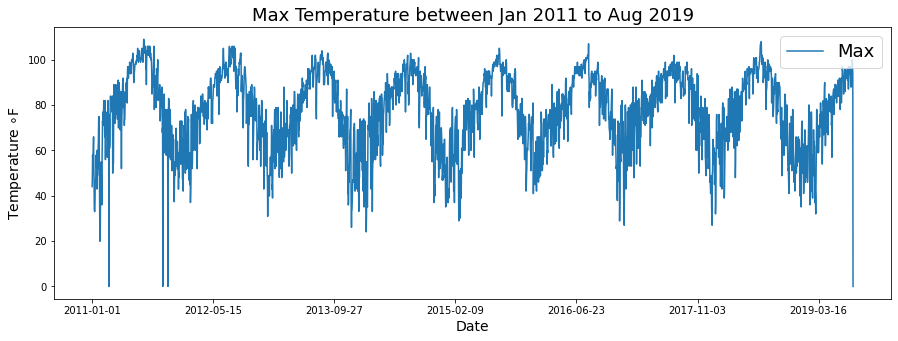

In [ ]:
# visualization

fig, ax = plt.subplots(figsize=(15,5))

labels = total_dataset['date'].values
data_label_pair = [('Max',total_label_data['OBS_tmpf_max'])]

for label,temp in data_label_pair:
  plt.plot(np.arange(len(labels)),temp,label=label)

ax.set_xticks(np.arange(len(labels))[::500]) 
ax.set_xticklabels(labels[::500])
plt.ylabel("Temperature $\circ$F",fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.legend(loc='upper right',fontsize=18)
plt.title('Max Temperature between Jan 2011 to Aug 2019', fontsize=18)

In [ ]:
# However, the number of features is too big for our dataset. 
# For now, let's try with only 50 features from GFS model 
feature_list = total_feature_data.iloc[:,:51] #date + 50 features

# we only need maximum temperature from obs
class_list = total_label_data['OBS_tmpf_max'][:]

In [ ]:
# Function to split data based on given dates
def split_data_year(input_data,labels,start_date_str,end_date_str):
  data = input_data.copy()
  date_list = pd.to_datetime(data['date'])
  date_mask = (date_list > start_date_str) & (date_list <= end_date_str)
  out_data = data.loc[date_mask,:].drop(['date'],axis=1)
  out_labels = labels.loc[date_mask]
  return out_data,out_labels

### *Exercise*

Use only 2018 data, design a simple model to predict max temperature.

Case 1

In [ ]:
# take only 2018 data
all_x_2018, all_y_2018 = split_data_year(feature_list, class_list,'2018-01-01','2018-12-31')

# randomly split 80% data for training set and 20% data for testing set
train_x, test_x, train_y, test_y = train_test_split(all_x_2018, all_y_2018, train_size=0.8)

In [ ]:
print(f'Training data shape: {train_x.shape}')
print(f'Observation data shape: {train_y.shape}')
print(f'Testing data shape: {test_x.shape}')

Training data shape: (292, 50)
Observation data shape: (292,)
Testing data shape: (74, 50)


In [ ]:
# Train and evaluate the model to predict max temperature
linear_regression_model = LinearRegression()

#Train
linear_regression_model.fit(train_x.values,train_y.values)

# score on training set
score = linear_regression_model.score(train_x.values,train_y.values)
print(f'R squared score on training set: {score}')

# score on testing set
score = linear_regression_model.score(test_x.values,test_y.values)
print(f'R squared score on testing set: {score}')


R squared score on training set: 0.9732699415292546
R squared score on testing set: 0.9610550202638286


**Question**

Is this result credible?

Case 2

In [ ]:
train_x, train_y=split_data_year(feature_list, class_list,'2018-01-01','2018-9-30')
test_x, test_y=split_data_year(feature_list, class_list,'2018-10-01','2018-12-31')

# Train and evaluate the model to predict max temperature
linear_regression_model = LinearRegression()

#Train
linear_regression_model.fit(train_x.values,train_y.values)
# Evaluate R^2
print(f'Training data shape: {train_x.shape}')
print(f'Observation data shape: {train_y.shape}')
print(f'Testing data shape: {test_x.shape}')

score = linear_regression_model.score(train_x.values,train_y.values)
print(f'R squared score on training set: {score}')

score = linear_regression_model.score(test_x.values,test_y.values)
print(f'R squared score on testing set: {score}')

Training data shape: (274, 50)
Observation data shape: (274,)
Testing data shape: (91, 50)
R squared score on training set: 0.9734015530015852
R squared score on testing set: 0.898175623340627



 **Questions** 

Why is testing score lower with the second data splitting method?

Why isn't training score perfect?

In Case 1, the training and testing set were both randomly selected from the entire 2018 dataset. This splitting method is not very sensible with our dataset. Here, the purpose of this ML model is for predicting future unknowns, instead of any historical data. The splitting method in Case 2 reserve October to December data for the testing set, which serves as the "future" unknown data for the model. In this case, the performance evaluation is more credible than the first case. 

### *Split the entire dataset*

use 2011-2017 as the training set
use 2018-2019 as the testing set

In [ ]:
#Training data between 2011 and 2017
train_x, train_y = split_data_year(feature_list, class_list,'2011-01-01','2017-12-31')

#Testing data between 2018 and 2019
test_x, test_y = split_data_year(feature_list, class_list,'2018-01-01','2019-12-31')

print(train_x.shape)
print(test_x.shape)

(2558, 50)
(583, 50)


In [ ]:
linear_regression_model = LinearRegression()
#Train
linear_regression_model.fit(train_x.values,train_y.values)
# Evaluate R^2
print(f'Testing data shape: {train_x.shape}')
print(f'Observation data shape: {train_y.shape}')

score = linear_regression_model.score(train_x.values,train_y.values)
print(f'R squared score on training set: {score}')

score = linear_regression_model.score(test_x.values,test_y.values)
print(f'R squared score on testing set: {score}')

Testing data shape: (2558, 50)
Observation data shape: (2558,)
R squared score on training set: 0.9264299564913565
R squared score on testing set: 0.8493050236751036


### Dataset independence 
- **Critical** when deploying machine learning models. 
  - Training and evaluating on the same data gives an unrealistic view of how the model will perform on new data
  - Instead, split the data into **training** and **testing** datasets that are independent enough to provide a clear picture

## Transforming Data

### Normalization and Scaling

 
Why should you scale your data?


In [ ]:
# see the ranges of features: GFS0_pmsl_max GFS0_sktc_max
# PMSL - Mean sea level pressure (hPa)
max1=train_x['GFS0_pmsl_max'].max(axis=0)
min1=train_x['GFS0_pmsl_max'].min(axis=0)
range1=max1-min1
print("Feature: GFS0_pmsl_max")
print("range: "+str(range1))
print("max: "+str(max1))
print("min: "+str(min1))

print("")

# SKTC - Skin temperature (C)
max2=train_x['GFS0_sktc_max'].max(axis=0)
min2=train_x['GFS0_sktc_max'].min(axis=0)
range2=max2-min2
print("Feature: GFS0_sktc_max")
print("range: "+str(range2))
print("max: "+str(max2))
print("min: "+str(min2))


Feature: GFS0_pmsl_max
range: 40.799999999999955
max: 1044.5
min: 1003.7

Feature: GFS0_sktc_max
range: 55.54
max: 53.64
min: -1.9


- Data variables with different scales affects what variables the ML models find important, i.e., MSLP dominants in our case


- Normalizing or scaling data removes this issue.



- More details about each transformation method can be found [here](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py)


***MinMaxScaler***

Scalar = $\frac{x_{i} - min(x)}{max(x) - min(x)}$

Scales data between 0 and 1 based on training data minimum and maximum values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Fit/find minimum and maximum value for each input variable
min_max_model = MinMaxScaler().fit(train_x)

# This saves the values to apply or 'transform' testing data
train_x_minmax = min_max_model.transform(train_x)

print('Training data range \nMax:',np.nanmax(train_x_minmax),', Min:',np.nanmin(train_x_minmax))

# Apply the min/max values to testing data
test_x_minmax = min_max_model.transform(test_x)

print('\nTesting data range \nMax:',np.nanmax(test_x_minmax),
    ', Min:',np.nanmin(test_x_minmax))

Training data range 
Max: 1.0 , Min: 0.0

Testing data range 
Max: 243.26 , Min: -0.019607843137258385


***StandardScaler***

Scalar = $\frac{x_{i}-mean(x)}{stdev(x)}$

Scaled data normally distributed, mean of zero, and unit variance using training data mean and standard deviation values.


In [ ]:
from sklearn.preprocessing import StandardScaler

standard_model = StandardScaler().fit(train_x)
train_x_std = standard_model.transform(train_x)

print('Training data range \nMean:',np.nanmean(train_x_std),
    ', Standard Dev:',np.nanstd(train_x_std))

test_x_std = standard_model.transform(test_x)
print('\nTesting data range \nMean:',np.nanmean(test_x_std),
    ', Standard Dev:',np.nanstd(test_x_std))

Training data range 
Mean: 1.4335019141662038e-15 , Standard Dev: 0.7348469228349535

Testing data range 
Mean: 0.2019871757498234 , Standard Dev: 4.999869947646501


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

K=11
knn=KNeighborsRegressor(n_neighbors=K,weights='distance')
knn.fit(train_x, train_y)
print("before: ",knn.score(test_x,test_y))

knn=KNeighborsRegressor(n_neighbors=K,weights='distance')
knn.fit(train_x_std, train_y)
print("after:  ",knn.score(test_x_std,test_y))


before:  0.7581977133889493
after:   0.8023286330780351


In [ ]:
from sklearn.tree import DecisionTreeRegressor
N=100
dt=DecisionTreeRegressor(min_samples_leaf=N)
dt.fit(train_x, train_y)
print("before: ",dt.score(test_x,test_y))

dt=DecisionTreeRegressor(min_samples_leaf=N)
dt.fit(train_x_minmax, train_y)
print("after:  ",dt.score(test_x_minmax,test_y))

before:  0.8002117676579893
after:   0.8002117676579894


**Question**

Why is Decision Trees invariant?

### Feature Space Reduction


**Why perform dimensionality reduction?**
- Model training is faster on smaller dimensional datasets
- Avoid curse of dimensionality
- Only train on independent and not redundant features

- Requires less space to store data
- Easier to visualize in lower dimensional space

<br>


#### Principal Component Analysis (PCA) 


PCA reduces the dimensionality of a dataset by creating new variables that are linear combinations of the original features. This way, less variables are needed to encompass the variability of the original data and redundant information is reduced. 

<br> 

The *principal components (PCs)* or new variables are linearly independent and uncorrelated, which can be beneficial for certain model assumptions. The first PC is a new variable with the most variance from the original dataset, the second PC is a new variable with the second most variance, etc. 


<br> 


Scaling is really important so that the PCs do not emphasize variables simply because they have large data ranges.

Find more information [here](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c
) and [here](
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60).






<img src=https://www.analyticsvidhya.com/wp-content/uploads/2016/03/2-1-e1458494877196.png
width="500">

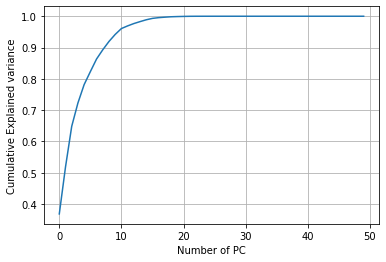

In [ ]:
from sklearn.decomposition import PCA

# PCA is a unsurpervised analysis
# only takes training feautre set as the input

pca = PCA().fit(train_x_std)

#Plot the cumulutive sum of the explained variance ratio 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of PC')
plt.ylabel('Cumulative Explained variance')
plt.grid(True)


In [ ]:
exp_var=0.9

pca_model = PCA(n_components = exp_var, svd_solver = 'full')
train_x_std_pca=pca_model.fit_transform(train_x_std)
test_x_std_pca=pca_model.transform(test_x_std)
N=100
dt=DecisionTreeRegressor(min_samples_leaf=N)
dt.fit(train_x_std_pca, train_y)
score=dt.score(test_x_std_pca,test_y)
print("score on low-dim datasets: "+str(score))


score on low-dim datasets: 0.7650133216956645


In [ ]:
#now use the original set
import timeit

train_x, train_y = split_data_year(total_feature_data, class_list,'2011-01-01','2017-12-31')
test_x, test_y = split_data_year(total_feature_data, class_list,'2018-01-01','2019-12-31')

print("example number: "+str(train_x.shape[0]))
print("feature number: "+str(train_x.shape[1]))


dt=DecisionTreeRegressor(min_samples_leaf=N)
dt.fit(train_x, train_y)
score=dt.score(test_x,test_y)
print("score on pre-normalized datasets: "+str(score))
print("")

# perform normalization 
standard_model = StandardScaler().fit(train_x)
train_x_std = standard_model.transform(train_x)
test_x_std = standard_model.transform(test_x)

# run DT with the normalized data
start = timeit.default_timer()
dt=DecisionTreeRegressor(min_samples_leaf=N)
dt.fit(train_x_std, train_y)
score=dt.score(test_x_std,test_y)
stop = timeit.default_timer()

print("score on normalized datasets: "+str(score))
print('Run Time: ', stop - start,'s')
print("")

# train PCA and transform data
pca_model = PCA(n_components = exp_var, svd_solver = 'full')
train_x_std_pca=pca_model.fit_transform(train_x_std)
test_x_std_pca=pca_model.transform(test_x_std)
print("feature number: "+str(train_x_std_pca.shape[1]))

# run PCA with the low dimentional data
start = timeit.default_timer()
dt=DecisionTreeRegressor(min_samples_leaf=N)
dt.fit(train_x_std_pca, train_y)
score=dt.score(test_x_std_pca,test_y)
stop = timeit.default_timer()

print("score on low-dim datasets: "+str(score))
print('Run Time: ', stop - start, 's')



example number: 2558
feature number: 2688
score on pre-normalized datasets: 0.9203168853132656

score on normalized datasets: 0.9203168853132657
Run Time:  1.32061759599992 s



NameError: ignored

# **Model Evaluation**

Some common evaluation metrics used with regression problems are: 

Mean absolute error (MAE): $\frac{1}{N} \sum\limits_{i = 1}^{N} \lvert \hat{y}_i - y_i \rvert$

Mean squared error (MSE): $\frac{1}{N} \sum\limits_{i = 1}^{N} (\hat{y}_i - y_i)^2$

Mean signed error ("bias"): $\frac{1}{N} \sum\limits_{i = 1}^{N} (\hat{y}_i - y_i)$

MAE skill score: $\frac{\textrm{MAE}_{\textrm{climo}} - \textrm{MAE}}{\textrm{MAE}_{\textrm{climo}}}$

-  $\textrm{MAE}_{\textrm{climo}}$ is the average training MAE


More evalution metrics can be found [here](https://scikit-learn.org/stable/modules/model_evaluation.html). 




In [ ]:
from sklearn.metrics import mean_squared_error
dt=DecisionTreeRegressor(min_samples_leaf=N)
dt.fit(train_x_std_pca, train_y)
pred_y = dt.predict(test_x_std_pca)
mse = mean_squared_error(pred_y,test_y)

print(f'Mean square error: {mse}')
print(f'\nPredicted values \n{pred_y[:5]}')

print(f'\nActual values \n{np.array(test_y.iloc[:5]) }')


Mean square error: 52.10309634861589

Predicted values 
[54.70296774 54.70296774 54.70296774 54.70296774 57.20483146]

Actual values 
[27.  50.  50.  63.  64.9]


Another type of verification/evaluation metric is the **reliability curve** 
- Shows model bias with respect to a conditional mean observation for each forecasted value
- What is the mean observed value for a given range of forecast values
- Data points above the 1-1 line are underforecasting, points under the line are overforecasting

In [ ]:
 def regression_reliability_curve(forecasts,observations,nbins=20):
  step = (np.nanmax(forecasts)-np.nanmin(forecasts))/nbins
  bins = np.arange(np.nanmin(forecasts),np.nanmax(forecasts),step)

  mean_forecast = np.empty( (np.shape(bins)) )*np.nan
  mean_obs = np.empty( (np.shape(bins)) )*np.nan

  # For each bin, find the mean forecast value and observation
  for b,bin in enumerate(bins[:-1]):
    bin_indices = np.where((forecasts >= bin) & (forecasts < bins[b+1]))[0]
    mean_forecast[b] = np.nanmean(forecasts[bin_indices])
    mean_obs[b] = np.nanmean(observations[bin_indices])

  #Get maximum value of both datasets to plot
  max_value = np.nanmax( [np.nanmax(forecasts) , np.nanmax(observations)] )
  perfect_values = np.arange(0.,max_value)

  plt.figure(figsize=(5,5))
  #Plotting 1-1 line
  plt.plot(perfect_values,perfect_values,linestyle='dashed',color='k')
  #Plotting mean forecast values versus the mean observations
  plt.plot(mean_forecast,mean_obs)
  plt.ylabel('Conditional Mean Observation',fontsize=16)
  plt.xlabel('Forecast value',fontsize=16)
  plt.title('Reliability Curve',fontsize=18)
  plt.show()
  return

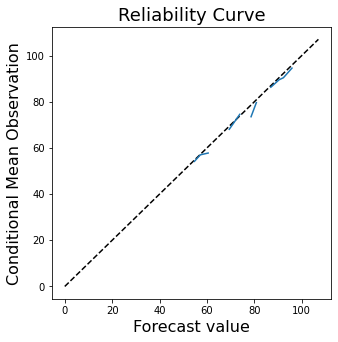

In [ ]:
# Reliability curve of high temperature linear regression model
regression_reliability_curve(pred_y, np.array(test_y), nbins=20)

## Classification Problems

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/800px-Precisionrecall.svg.png" width="600">


Recall = Probability of Detection (POD)

Precision: 1-False Alarm Ratio (FAR)


Contact Infomation:

    Mu-Chieh.Ko@noaa.gov